In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/Retail 6/Sample - Superstore.csv', encoding='windows-1254')

## **Data Understanding**

In [4]:
df.shape
# shape() : Melihat jumlah baris dan kolom.

(9994, 21)

dataset terdiri dari 9994 baris dan 21 kolom

In [5]:
df.info()
# info() : Nomor index beserta tipe datanya.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

df.dtype digunakan untuk mengecek tipe data variabel. pada variabel order date dan ship date bertipe data object. Seharusnya variabel order date dan ship date dapat menggunakan tipe data datetime.

In [6]:
# memperbaiki tipe data waktu
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

df.dtype digunakan untuk mengecek tipe data variabel. dari hasil pengecekan diatas didapat 3 tipe data integer, 3 tipe data float, 2 tipe data datetime dan 13 tipe data object.

> tipe data Integer: 
- Row ID
- Postal Code
- Quantity

> tipe data Float: 
- Sales
- Discount
- Profit

> tipe data Datetime: 
- Order Date
- Ship Date

> tipe data Object:
- Order ID
- Ship Mode
- Customer ID
- Customer Name
- Segment
- Country
- City
- State
- Region
- Product ID
- Category
- Sub-Category
- Product Name





In [7]:
df.describe()
# describe() : Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## **Pre-processing**

In [8]:
# mengganti spasi(" ") menjadi underscore ("_")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [9]:
# Data Missing Check
df.isnull().sum()
# isnull() : Mengecek variabel yang memiliki null/kosong.

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

Tidak ada missing value

In [10]:
# Data Duplicated
df.duplicated().sum()

0

Tidak ada duplikat data

In [11]:
num = ['row_id', 'postal_code', 'sales', 'quantity', 'discount', 'profit']
cat = ['order_id', 'order_date', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'region', 'product_id', 'category', 'sub-category', 'product_name']

kita akan membagi kolom numerical dan categorical.
> Pada kolom numberical terdapat variabel : Row ID, Postal Code, Sales, Quantity, Discount, dan Profit.

> Pada kolom categorical terdapat variabel : Order ID, Order Date, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Region, Product ID, Category, Sub-Category dan Product Name.

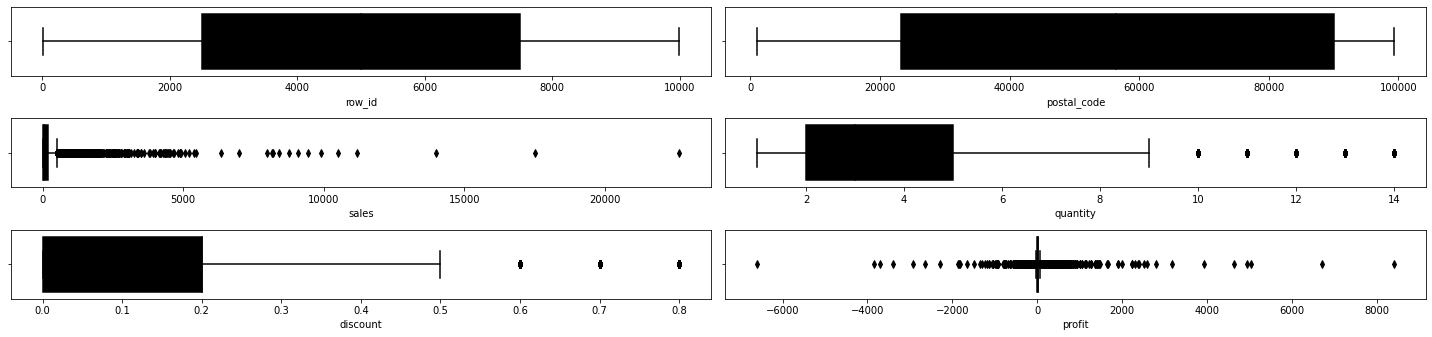

In [12]:
# Outlier
plt.figure(figsize=(20, 9))
for i in range(0, len(num)):
    plt.subplot(6, len(num)/3, i+1)
    sns.boxplot(df[num[i]], color='black')
    plt.tight_layout()

Variabel yang memiliki outlier yaitu Sales, Quantity, Discount dan Profit.
data ini memiliki banyak outlier dapat mempengaruhi 
data outlier ini tidak dihapus karena data tersebut akan digunakan untuk modeling data. karena data time series membutuhkan data yang lengkap setiap waktunya dan pergerakkan outlier sangt mempengaruhi. 

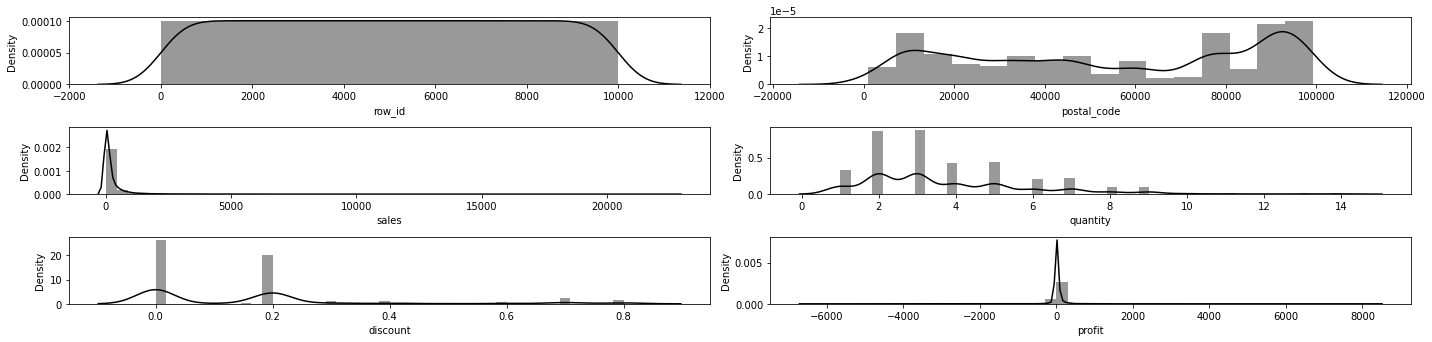

In [13]:
plt.figure(figsize=(20, 9))
for i in range(0, len(num)):
    plt.subplot(6, len(num)/3, i+1)
    sns.distplot(df[num[i]], color='black')
    plt.tight_layout()

Distribusi normal pada hasil diatas yaitu: row_id

In [14]:
print('Skew: {}'.format(df[num].skew()))

Skew: row_id          0.000000
postal_code    -0.128526
sales          12.972752
quantity        1.278545
discount        1.684295
profit          7.561432
dtype: float64


Skewness merupakan ukuran ketidaksimetrisan dalam penyebaran data. Skewness dapat bernilai positif, negatif, dan nol.
> Skewness nol: Row ID
>> Skewness nol berarti nilai terdistribusi secara simetris, dengan jarak antara ekor distribusi sebelah kanan dan kiri sama besar

> Skewness positif: Sales, Quantity, Discount dan Profit
>> Skewness positif berarti ekor distribusi berada di sebelah kanan nilai terbanyak. Artinya mayoritas nilai distribusi berada di kiri kurva.

> Skewness neganif: Postal Code
>> Skewness negatif berarti ekor distribusi berada di sebelah kiri. Artinya mayoritas nilai distribusi berada di kanan kurva. akan tetapi pada variabel Postal Code index skewness -0.128526 sehingga bentuk kurva hampir simetris.

